In [37]:
import rioxarray as rxr
from pprint import pprint
import numpy as np

In [38]:

# Define the path to the DEM file.
# This path is relative to the location of the notebook.
dem_path = r"D:\OneDrive - University of Georgia\multiscale_tda_geomorphology\data\processed\dem_1arcsec\USGS_1_n24w106.tif"

# Open the DEM file using rioxarray.
# This loads the data and metadata into a powerful xarray.DataArray object.
# We use .squeeze() to remove the 'band' dimension since it's a single-band raster.
try:
    dem_da = rxr.open_rasterio(dem_path).squeeze()

    # Print the shape and CRS to confirm it loaded correctly.
    print(f"The shape of the DEM DataArray is: {dem_da.shape}")
    print(f"The CRS of the DEM is: {dem_da.rio.crs}")
    print("-" * 30)

    # Now you can work with `dem_da` directly.
    # xarray DataArrays have built-in methods for calculations, which are often
    # aware of 'no data' values. We use .item() to extract the scalar value.
    print("Basic Statistics:")
    print(f"Min value: {dem_da.min().item():.2f}")
    print(f"Max value: {dem_da.max().item():.2f}")
    print(f"Mean value: {dem_da.mean().item():.2f}")
    print("-" * 30)

    # If you ever need the raw NumPy array for a library that requires it,
    # you can access it with the .values attribute.
    dem_numpy_array = dem_da.values
    print(f"The underlying data type is: {type(dem_numpy_array)}")

except Exception as e:
    print(f"An error occurred: {e}")
    print("Please ensure the file path is correct and the necessary libraries are installed.")

The shape of the DEM DataArray is: (3612, 3612)
The CRS of the DEM is: EPSG:4269
------------------------------
Basic Statistics:
Min value: 17.85
Max value: 2920.00
Mean value: 1545.41
------------------------------
The underlying data type is: <class 'numpy.ndarray'>


In [39]:
pprint((dem_numpy_array > -3313).astype(int))

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], shape=(3612, 3612))


array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3612, 3612))


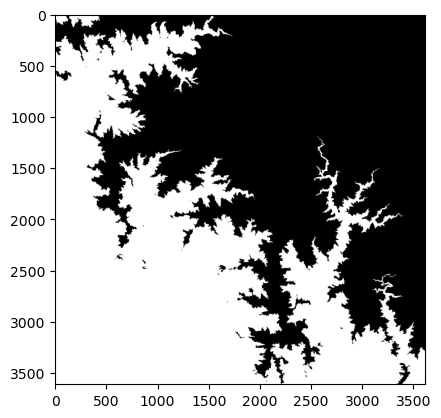

In [44]:
import matplotlib.pyplot as plt

np_array = (dem_numpy_array > 1545.41).astype(int)
pprint(np_array)
fig, ax = plt.subplots()

plt.imshow(-1*np_array, cmap="gray")